In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
import os
import numpy as np
from scipy.stats import shapiro,mannwhitneyu,levene


# Mini-Project: Accuracy and Precision of RAPL-Based Energy Measurements
**Course:** Elective course: Energy Consumption E2025\
**Author:** Eray Erkul  
**Date:** 19 November 2025  

---

**In this assignment, I will analyze the energy consumption of the cpu and memory (DRAM) using stress-ng for both getting powered by a programmable DC power supply and from a power supply using RAPL.**

**References:**
Some markdowns and codes are used from the **"DataChunking_sigmark_RAPLcharacterization.ipynb"** and **"DataProcessing_template.ipynb"** on the moodle. 

My previous assignments, assignment 1 and 2.

Crucial. How Much Power Does Memory Use? Crucial, Micron Technology, Inc., 2024, https://www.crucial.in/support/articles-faq-memory/how-much-power-does-memory-use.

**"RAPL in Action: Experiences in Using RAPL for Power Measurements"** - [doi.org/10.1145/3177754](https://doi.org/10.1145/3177754).

**stress-ng - a tool to load and stress a computer system** - https://manpages.ubuntu.com/manpages/focal/man1/stress-ng.1.html

**"DETERMINATION OF SAMPLE SIZE AND SAMPLING METHODS IN APPLIED RESEARCH"** - DOI:10.24874/PES03.01.003.

Lastly **AI** was also used to give an overview of my project and if i had missed something from the requirements. Few code was used with AI and modified by me, to match with the needs i had. These places are noted as #AI as a comment next to the code.

# 1. Introduction
## Research Question

**Overall Question:**  
How accurate and precise are RAPL-based energy measurements compared to external power measurements, and does their performance depend on software characteristics?

**Precise Research Question:**  
Do RAPL-based energy measurements differ systematically in mean or variance from external power measurements for CPU-bound and memory-bound workloads?

## Hypothesis
### 1. Energy Consumption Between Workloads
- **Null Hypothesis (H₀):** There is no significant difference in normalized energy consumption between CPU-bound and memory-bound workloads.  
- **Alternative Hypothesis (H₁):** There is a significant difference in normalized energy consumption between CPU-bound and memory-bound workloads.  

### 2. Measurement Methods
- **Null Hypothesis (H₀):** There is no significant difference in normalized energy measurements between the RAPL and external power measurement methods.  
- **Alternative Hypothesis (H₁):** There is a significant difference in normalized energy measurements between the RAPL and external power measurement methods.  

### 3. Variance (Precision) Between Methods
- **Null Hypothesis (H₀):** The variance (precision) of normalized energy measurements does not differ significantly between RAPL and external methods.  
- **Alternative Hypothesis (H₁):** The variance (precision) of normalized energy measurements differs significantly between RAPL and external methods.  




---

## 2. Data and Methodology

**Independent variable:**  
The independent variable in this experiment is the stress tests for CPU and memory (DRAM).

**Dependent variable:**  
The dependent variable is the energy consumption that CPU and memory use during the test and is measured by using RAPL. 

**Choice of Dependent Variables:**
CPU and Memory (DRAM) were chosen for testing because the CPU is mandatory, and memory plays an important role when executing programs. DRAM stores data temporarily while programs are running, meaning it is constantly in use. DRAM speed varies depending on its generation; for example, DDR5 offers clock speeds ranging from approximately 4800 MT/s to 7000 MT/s. Despite its high speed, DRAM generally consumes small amount of energy.

**Controlled variables:**
All tests are conducted under the following controlled conditions:
- Hardware: All test PCs use identical hardwares.
- Operating system: All PCs run the same Linux and version (Ubuntu Server 24.04 LTS).
- All executions were run at 20 seconds while had a break every 10 seconds.
- Power and services: This test, all PCs is connected to a programmable DC Power Supply and all background services are disabled to get a stable result.
- Cooling and environment: Tests are done at similar device temperatures, on the same surface, and under similar surrounding conditions.

**Modified data**
In Assignment 1, the CSV file used a semicolon as a separator, which had to be replaced with a comma. After fixing this, I had two dataframes, one for the CPU data and one for the memory data. Then I combined these dataframes into a single dataframe. The features I used (PKG, CPU, and Time) were normalized to make the data more comparable, since some data points had longer execution times than others. Negative values were then removed from the dataset along with any outliers.

Assignment 1 dataset included features like: test, PKG, CPU, nn, nn2, and time. 



In Assignment 2, I had to chunk the data, which resulted in two dataframes: dfs and df_power. The dfs dataframe contained the three main features I used. These being duration, energy, and power_avg, while df_power contained the payload feature. I normalized the dfs dataframe to ensure fair comparisons between data points. After that, I checked for negative values (and found none) and removed outliers.

Assignment 2 datasets included features like: computerID, class, start_time, channelId, exp_duration, duration,	energy,	power_avg, and ID for the first dataframe and the other dataset had features like: timestamp,	channel,	action,	payload,	time,	ID, and	class 




---





#### Assignment 1: 
In this experiment, energy consumption was measured for both CPU-intensive and memory-intensive (DRAM) workloads using Intel’s Running Average Power Limit (RAPL) feature. RAPL provides accurate energy consumption data and directly from the CPU. The stress-ng tool was used to stress test which apply heavy load to the CPU and DRAM. Additionally, the memory test code was updated to match the structure of the code used for the other test classes. The laptop was powered by a power supply.


**Experimental setup:**
The experiment was performed on a Dell Latitude laptop with the following specifications:
- Intel® Core™ i5-8350U @ 1.70GHz
- System Memory: between 15 and 16 GB RAM
- Storage: 436 GB left - NVME.

Most background services were disabled during the stress tests, although the dbus service could not be turned off.
After connecting the laptop to a power supply, Stress-ng stress tests were performed in 400 times for both CPU and memory classes (400 data points for CPU and 400 data points for memory), with each execution time lasting 20 seconds.

**Controlled Setup:**
A controlled setup was not implemented in this experiment. The reason is that all tests were performed under the same stress conditions, and not in an idle condition.


#### Assignment 2: 
This experiment measures the energy consumption of CPU-intensive and memory-intensive (DRAM) workloads using a programmable DC power supply (SPD3303X-E by Siglent), which provides accurate external measurements of the laptop's energy usage. The stress-ng tool was used to generate different tests that place heavy loads on the CPU and memory. The memory test code was adjusted to follow the same structure as the CPU tests. The laptop under test was powered directly by the programmable DC supply.

**Experimental setup:**
The experiment was performed on a Dell Latitude laptop with the following specifications:
- Intel® Core™ i5-8350U @ 1.70GHz
- System Memory: between 15 and 16 GB RAM
- Storage: between 436-500+ GB NVME.

Most background services were disabled during the stress tests, although the dbus service could not be turned off.
The laptop was powered by a programmable DC power supply (model: SPD3303X-E by Siglent). After connecting the laptop to the power supply (into channel 2 (CH2) in my case), the tests were run.
A total of 35 experiments were done, with a 10-second pause between each run. The number of experiments was limited to 35 due to time constraints.


**Controlled Setup:**
A controlled setup was not implemented in this experiment. The reason is that all tests were performed under the same stress conditions, and not in an idle condition.



***Import of Data**

In [31]:
import pandas as pd
from scipy import integrate
import numpy as np
import os
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import normaltest
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu


In [32]:
ls ..\\External\\

 Volume in drive C has no label.
 Volume Serial Number is F6D7-DE80

 Directory of c:\Users\eray2\Documents\Github\semester3\Energy-Consumption-2025\External

19-11-2025  03:11    <DIR>          .
19-11-2025  03:00    <DIR>          ..
02-11-2025  15:24            51.359 DK1081249_cpu_1761814012683_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            51.007 DK1081249_cpu_1761814042924_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            58.863 DK1081249_cpu_1761814073319_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            55.481 DK1081249_cpu_1761814103616_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            58.082 DK1081249_cpu_1761814133855_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            56.295 DK1081249_cpu_1761814164131_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            54.505 DK1081249_cpu_1761814194510_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            61.705 DK10812

## Import the External Data from the External folder (Chunked Data)

In [33]:
#import all the CSV files for External measurements (Chunked Data)

input_directory = '..\\External\\'
# (a) Read from row 3 and on into df and calculate energy consumption
# (b) Read the first two lines with meta data, add the calculated energy consumption and concat to the existing
ID = 0
list_of_metadataframes = []
list_of_dataframes = []
for input_file in os.listdir(input_directory):
    file_path = input_directory+'/'
    file_name = os.path.basename(input_file)
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path+file_name,skiprows=2, names=['timestamp','channel','action','payload'])
        df['time'] = (df['timestamp']-df['timestamp'].min()) / 1000
        df['ID'] = ID
        x = df['time']
        y = df['payload']
        y_int = integrate.cumulative_trapezoid(y, x, initial=0)

        energy = y_int[-1]
        df_main = pd.read_csv(file_path+file_name,nrows=1,header=0)
        df_main['duration']=df['time'].max() # in seconds
        df_main['energy']=energy  # in joules
        df_main['power_avg']= energy/df_main['duration'] # in Watt
        df_main['ID'] = ID
        df['class']=df_main['class'][0]
        df['ID'] = ID
        list_of_metadataframes.append(df_main)
        list_of_dataframes.append(df)
        ID = ID + 1

dfs = pd.concat(list_of_metadataframes)
df_powers = pd.concat(list_of_dataframes)
df_powers = df_powers.reset_index(drop=True)
dfs = dfs.sort_values(by='class')
dfs = dfs.reset_index(drop=True)


In [34]:
dfs.head(1) # contain both classes

,computerID,class,start_time,channelId,exp_duration,duration,energy,power_avg,ID
0,DK1081249,cpu,1761814012683,CH2,20224,20.209,563.95444,27.906103,0


In [35]:
dfs['method'] = 'External'
dfs = dfs.drop(columns=['start_time','channelId','duration','ID'])


In [36]:
# function to import the data from the tests
def import_data(filename):
    # read csv: outputs a datframe with 2 columns split by ";"
    df = pd.read_csv(filename, delimiter=";", decimal=".",  names=['test',"other"])

    # the "other" column contains all the test data and can be obtained by splitting with ","
    split_cols = df.iloc[:, 1].str.split(",", expand=True)
    
    # define columns and drop the useless ones "1", "2" and "other" from original dataframe
    split_cols.columns = ["CPU", "PKG", "1", "2", "time"]
    split_cols.drop(columns=["1", "2"], inplace=True)
    df.drop(columns="other", inplace=True)

    # convert the data to floats
    split_cols = split_cols.apply(pd.to_numeric, errors='coerce').astype('float64')
    
    # result is a concatenation the two
    df = pd.concat([df, split_cols], axis=1)
    
    return df

## Import the RAPL Data from the RAPL folder

In [37]:
# alter the name of your data files are csv (if the data is in a single file, remove the other)
file_name1 = '../Assignment 1/cpu-stress-ng.csv'
file_name2 = '../Assignment 1/memory-stress-ng.csv'

df_RAPL = pd.concat([import_data(file_name1),import_data(file_name2)])

print("RAPL tests")
print(df_RAPL.describe())



RAPL tests
                 CPU            PKG          time
count     800.000000     800.000000    800.000000
mean       75.523317      27.739339  21936.753000
std      9276.013416    9266.708860   1710.199352
min   -261955.759705 -261740.741150  20213.000000
25%       384.326294     351.949402  20331.075000
50%       397.559082     362.471436  21291.100000
75%       447.528870     388.768463  23303.325000
max       780.842224     749.859436  28488.300000


In [38]:
df_RAPL["test"] = df_RAPL["test"].astype(str).str.strip()

df_RAPL  = df_RAPL[df_RAPL['PKG']>0]

In [39]:
dfs_RAPL = pd.DataFrame()
dfs_RAPL['class'] = df_RAPL['test']
dfs_RAPL['energy'] = df_RAPL['PKG']
dfs_RAPL['exp_duration'] = df_RAPL['time']
dfs_RAPL['computerID'] = dfs['computerID'][0]
dfs_RAPL['power_avg'] = dfs_RAPL['energy'] / (df_RAPL['time']/1000)
dfs_RAPL['method'] = "RAPL"



In [40]:
dfs_RAPL

,class,energy,exp_duration,computerID,power_avg,method
0,cpu,749.859436,20296.5,DK1081249,36.945258,RAPL
1,cpu,450.172913,20398.4,DK1081249,22.069031,RAPL
2,cpu,418.648560,20244.8,DK1081249,20.679313,RAPL
3,cpu,415.841675,20418.0,DK1081249,20.366425,RAPL
4,cpu,416.566711,20353.9,DK1081249,20.466186,RAPL
...,...,...,...,...,...,...
395,memory,371.022034,23800.9,DK1081249,15.588572,RAPL
396,memory,183.562012,23779.2,DK1081249,7.719436,RAPL
397,memory,358.072510,22604.3,DK1081249,15.840902,RAPL
398,memory,381.284973,23190.3,DK1081249,16.441571,RAPL


In [41]:
df = pd.concat([dfs,dfs_RAPL])
df = df.rename(columns={"class": "characteristica_class"})

In [42]:
df.to_csv('data.csv')

### 2.1 Normalization


The experimental duration differs; we will normalize to 20 seconds to ensure energy values are comparable even if runtime differs between measurements.


In [43]:
# Normalize energy to 20 seconds (20,000 ms)
df["energy_norm20s"] = df["energy"] * (20000 / df["exp_duration"])


Now the data is now imported and normalized.

## 2.2 First Glance at Data

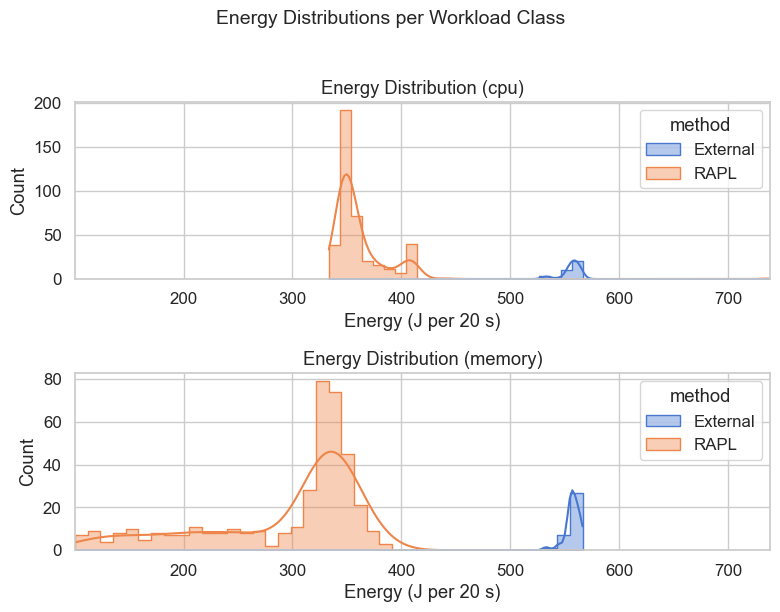

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

classes = df["characteristica_class"].unique()
n = len(classes)

# Find global min and max for consistent x-axis limits
xmin = df["energy_norm20s"].min()
xmax = df["energy_norm20s"].max()

plt.figure(figsize=(8, 3 * n))

for i, cls in enumerate(classes, 1):
    plt.subplot(n, 1, i)
    sns.histplot(
        data=df[df["characteristica_class"] == cls],
        x="energy_norm20s",
        hue="method",
        element="step",
        kde=True,
        bins=40,
        alpha=0.4
    )
    plt.title(f"Energy Distribution ({cls})")
    plt.xlabel("Energy (J per 20 s)")
    plt.ylabel("Count")
    plt.xlim(xmin, xmax)        # <-- keeps x-axis consistent

plt.suptitle("Energy Distributions per Workload Class", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


The graphs show that the RAPL measurements, which is the data recorded when the laptop was plugged into a power supply, use significantly less energy compared to the external measurements, which were taken when the laptop was connected to a programmable DC power supply. RAPL shows a wider distribution with larger spikes compared to the external measurements which are more narrow and have smaller spikes.
Both of these graph do not show any types of normal distribution. 

## 3. Statistical Analysis


### 3.1 Normality Assessment (Assumption Testing)

In [45]:


# -----------------------------------------------------------
# Goal: Test whether normalized energy distributions are
#       normally distributed for each characteristica class and method.
# -----------------------------------------------------------

for (cls, method), subset in df.groupby(["characteristica_class", "method"]):
    stat, p = shapiro(subset["energy_norm20s"])
    print(f"{cls} - {method}: p = {p:.4f}")

    # --- Interpretation section ---
    if p < 0.05:
        print("  → The data deviates significantly from a normal distribution (p < 0.05).")
        print("  → Interpretation: The energy measurements are NOT normally distributed,")
    else:
        print("  → No significant deviation from normality (p ≥ 0.05).")
        print("  → Interpretation: The energy measurements are approximately normal,")


cpu - External: p = 0.0000
  → The data deviates significantly from a normal distribution (p < 0.05).
  → Interpretation: The energy measurements are NOT normally distributed,
cpu - RAPL: p = 0.0000
  → The data deviates significantly from a normal distribution (p < 0.05).
  → Interpretation: The energy measurements are NOT normally distributed,
memory - External: p = 0.0004
  → The data deviates significantly from a normal distribution (p < 0.05).
  → Interpretation: The energy measurements are NOT normally distributed,
memory - RAPL: p = 0.0000
  → The data deviates significantly from a normal distribution (p < 0.05).
  → Interpretation: The energy measurements are NOT normally distributed,


Assumption testing assumes that the distributions of normalized energy consumption for each class do not appear to be normally distributed.

### 3.2 Accuracy of RAPL Measurements (Not normal distributions)

In [46]:
# Mann–Whitney U test comparing RAPL vs External (per software characteristica)
# Reports mean difference and p-values

# -----------------------------------------------------------
# Goal: Compare accuracy of RAPL vs External energy measurements
#       for each characteristica class using Mann–Whitney U test.
# 
# -----------------------------------------------------------

for cls in df["characteristica_class"].unique():
    data_ext = df[(df["characteristica_class"] == cls) & (df["method"] == "External")]["energy_norm20s"]
    data_rapl = df[(df["characteristica_class"] == cls) & (df["method"] == "RAPL")]["energy_norm20s"]
    stat, p = mannwhitneyu(data_ext, data_rapl, alternative="two-sided")
    print(f"{cls}: Mann–Whitney U p = {p:.4f}")

    # Compute mean difference (RAPL - External)
    diff = data_rapl.mean() - data_ext.mean()
    
    print(f"\n{cls.upper()}: Mann–Whitney U p = {p:.4f}, mean diff = {diff:.2f} J (RAPL - External)")
    
    # --- Interpretation section ---
    if p < 0.05:
        print("  → Significant difference between RAPL and External measurements (p < 0.05).")
        if diff < 0:
            print(f"  → RAPL reports LOWER energy than External by about {abs(diff):.1f} J.")
            print("  → Interpretation: RAPL underestimates total system energy consumption, "
                  "likely due to limited power-domain coverage (CPU only).")
        else:
            print(f"  → RAPL reports HIGHER energy than External by about {diff:.1f} J.")
            print("  → Interpretation: RAPL overestimates energy for this workload (rare).")
    else:
        print("  → No significant difference between RAPL and External (p ≥ 0.05).")
        print("  → Interpretation: RAPL provides comparable mean energy values for this workload.")


cpu: Mann–Whitney U p = 0.0000

CPU: Mann–Whitney U p = 0.0000, mean diff = -195.10 J (RAPL - External)
  → Significant difference between RAPL and External measurements (p < 0.05).
  → RAPL reports LOWER energy than External by about 195.1 J.
  → Interpretation: RAPL underestimates total system energy consumption, likely due to limited power-domain coverage (CPU only).
memory: Mann–Whitney U p = 0.0000

MEMORY: Mann–Whitney U p = 0.0000, mean diff = -264.69 J (RAPL - External)
  → Significant difference between RAPL and External measurements (p < 0.05).
  → RAPL reports LOWER energy than External by about 264.7 J.
  → Interpretation: RAPL underestimates total system energy consumption, likely due to limited power-domain coverage (CPU only).


Across classes, the Mann–Whitney U test indicates that RAPL usually measures lower energy than the external method. This shows a significant difference and suggesting that RAPL underestimates total system energy.

### 3.3 Precision of RAPL Measurements

In [47]:
# Levene’s test comparing variance between RAPL and External

# -----------------------------------------------------------
# Goal: Test whether RAPL and External measurements have
#       significantly different variances (precision check)
#       for each workload class.
# -----------------------------------------------------------

for cls in df["characteristica_class"].unique():
    data_ext = df[(df["characteristica_class"] == cls) & (df["method"] == "External")]["energy_norm20s"]
    data_rapl = df[(df["characteristica_class"] == cls) & (df["method"] == "RAPL")]["energy_norm20s"]

    # Levene’s test for equality of variances (center = "median" → robust to non-normality)
    stat, p = levene(data_ext, data_rapl, center="median")
    
    # Compute variance difference (RAPL - External)
    diff_var = data_rapl.var() - data_ext.var()
    
    print(f"\n{cls.upper()}: Levene’s test p = {p:.4f}, variance diff = {diff_var:.2f} (RAPL - External)")
    
    # --- Interpretation section ---
    if p < 0.05:
        print("  → Significant difference in measurement variance (p < 0.05).")
        if diff_var > 0:
            print(f"  → RAPL shows HIGHER variance, indicating lower precision "
                  f"(less consistent energy readings).")
        else:
            print(f"  → RAPL shows LOWER variance, indicating slightly higher precision.")
    else:
        print("  → No significant difference in measurement variance (p ≥ 0.05).")
        print("  → Interpretation: RAPL and External exhibit comparable precision.")
    



CPU: Levene’s test p = 0.0349, variance diff = 719.38 (RAPL - External)
  → Significant difference in measurement variance (p < 0.05).
  → RAPL shows HIGHER variance, indicating lower precision (less consistent energy readings).

MEMORY: Levene’s test p = 0.0000, variance diff = 5283.35 (RAPL - External)
  → Significant difference in measurement variance (p < 0.05).
  → RAPL shows HIGHER variance, indicating lower precision (less consistent energy readings).


Levene’s test shows that RAPL and the external measurements mostly have similar variance, meaning their precision is comparable. If there are any differences, RAPL will typically have a higher variance, indicating less consistent energy readings.

### 3.4 Software Characteristica-Specific Effects

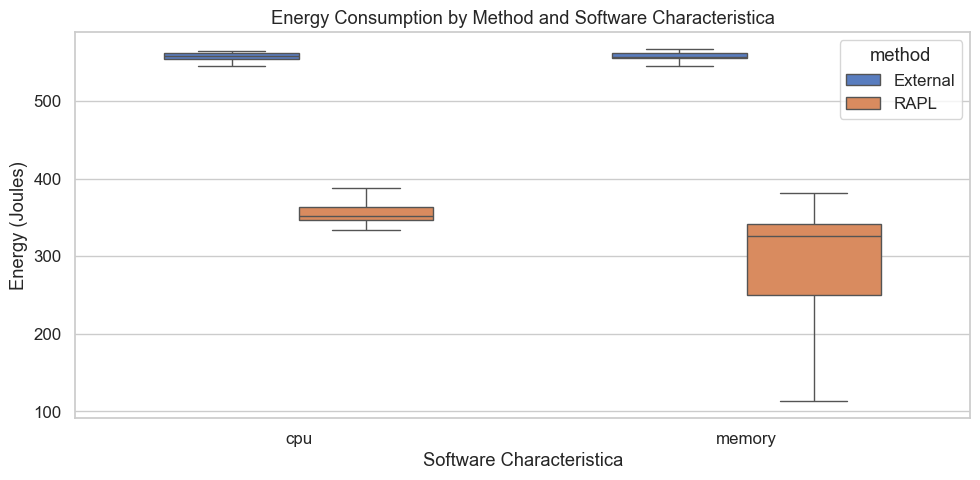

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df, x="characteristica_class", y="energy_norm20s", hue="method", showfliers=False, width=0.6)

plt.title("Energy Consumption by Method and Software Characteristica")
plt.xlabel("Software Characteristica")
plt.ylabel("Energy (Joules)")
plt.tight_layout()
plt.show()


The figure shows for each method (External, RAPL), can we statistically see a significant difference in time-normalized energy between CPU and memory. As seen before, the external method is using significant more energy than the RAPL method. The RAPL method do also have a wider distribution compared to External.

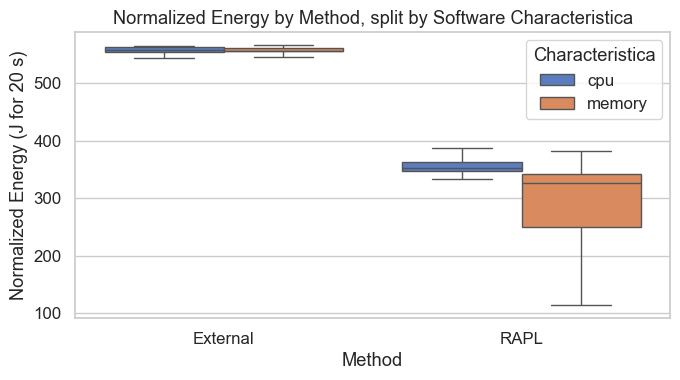

In [49]:
plt.figure(figsize=(7,4))
sns.boxplot(
    data=df,
    x="method", y="energy_norm20s",
    hue="characteristica_class",
    showfliers=False
)
plt.title("Normalized Energy by Method, split by Software Characteristica")
plt.xlabel("Method")
plt.ylabel("Normalized Energy (J for 20 s)")
plt.legend(title="Characteristica")
plt.tight_layout()
plt.show()


The boxplot shows normalized energy use for CPU and memory, compared by method. The External method has the characteristics all the way up, over 500 normalized energy, while RAPL records much lower energy compared to External. RAPL’s memory has a wider distribution.


In [50]:

# ----------------------------------------------------------------------
# Goal: For each method (External, RAPL), test if CPU vs [your choice]
#       differ in normalized energy. This reveals workload-dependent bias.

from scipy.stats import mannwhitneyu

software_characteristica_A = "cpu"
software_characteristica_B = "memory"

def rank_biserial_from_u(u, n1, n2):
    # Rank-biserial correlation: r_rb = 1 - 2U/(n1*n2)
    return 1 - 2 * (u / (n1 * n2))

methods = df["method"].unique()

for method in methods:
    cpu = df[(df["characteristica_class"] == software_characteristica_A) & (df["method"] == method)]["energy_norm20s"]
    fs  = df[(df["characteristica_class"] == software_characteristica_B) & (df["method"] == method)]["energy_norm20s"]

    # Mann–Whitney U (non-parametric, robust to non-normality)
    stat, p = mannwhitneyu(cpu, fs, alternative="two-sided")
    diff = fs.mean() - cpu.mean()
    r_rb = rank_biserial_from_u(stat, len(cpu), len(fs))

    print(f"\nMethod = {method}")
    print(f"  Mann–Whitney U p = {p:.4f}")
    print(f"  Mean difference ({software_characteristica_B} - {software_characteristica_A}) = {diff:.2f} J")
    print(f"  Rank-biserial correlation (effect size) r_rb = {r_rb:.3f}")

    # Interpretation
    if p < 0.05:
        print(f"  → Significant {software_characteristica_A} vs {software_characteristica_B} difference within this method.")
        if diff < 0:
            print(f"  → {software_characteristica_B} appears LOWER than {software_characteristica_A} by ~{abs(diff):.1f} J.")
        else:
            print(f"  → {software_characteristica_B} appears HIGHER than {software_characteristica_A} by ~{abs(diff):.1f} J.")
    else:
        print(f"  → No significant difference between {software_characteristica_A} and {software_characteristica_B} within this method.")

    # Method-specific context
    if method.lower() == "external":
        print("  → External reflects the *true* system energy; small differences are real but small.")
    else:
        print("  → RAPL reflects the *estimate*; larger differences indicate software characteristic-dependent bias "
              "due to incomplete power-domain coverage (e.g., I/O, peripherals).")



Method = External
  Mann–Whitney U p = 0.7246
  Mean difference (memory - cpu) = 1.17 J
  Rank-biserial correlation (effect size) r_rb = 0.050
  → No significant difference between cpu and memory within this method.
  → External reflects the *true* system energy; small differences are real but small.

Method = RAPL
  Mann–Whitney U p = 0.0000
  Mean difference (memory - cpu) = -68.42 J
  Rank-biserial correlation (effect size) r_rb = -0.767
  → Significant cpu vs memory difference within this method.
  → memory appears LOWER than cpu by ~68.4 J.
  → RAPL reflects the *estimate*; larger differences indicate software characteristic-dependent bias due to incomplete power-domain coverage (e.g., I/O, peripherals).


For External, the CPU and memory show no significant energy difference (p = 0.7246; 1.17 J), which means true system energy with minimal variation. RAPL however, shows a significant difference (p ≈ 0; −68.42 J), showing memory energy as lower than it really is due to software-dependent bias from incomplete power-domain coverage, particularly for I/O and peripherals.

In [52]:
# Compute per-class mean energies
means = df.groupby(["characteristica_class", "method"])["energy_norm20s"].mean().unstack()
means["bias_RAPL_vs_External"] = means["RAPL"] - means["External"]
means

# Display the table
print("Per-class mean normalized energies (J for 20 s):\n")
print(means.round(3))
print("\n--- Interpretation ---")

# Interpret each row
for cls, row in means.iterrows():
    bias = row["bias_RAPL_vs_External"]
    print(f"\n{cls.upper()}:")
    if bias < 0:
        print(f"  → RAPL underestimates energy by {abs(bias):.2f} J compared to the external power meter.")
    elif bias > 0:
        print(f"  → RAPL overestimates energy by {bias:.2f} J compared to the external power meter.")
    else:
        print("  → No bias detected; RAPL and external readings are identical on average.")


# Optional: concise overall statement
avg_bias = means["bias_RAPL_vs_External"].mean()
print("\nOverall:")
print(f"  → On average, RAPL underestimates total energy by {abs(avg_bias):.1f} J per 20 s run "
      f"({(abs(avg_bias)/means['External'].mean())*100:.1f}% of total energy).")

Per-class mean normalized energies (J for 20 s):

method                 External     RAPL  bias_RAPL_vs_External
characteristica_class                                          
cpu                     556.175  361.075               -195.100
memory                  557.344  292.651               -264.693

--- Interpretation ---

CPU:
  → RAPL underestimates energy by 195.10 J compared to the external power meter.

MEMORY:
  → RAPL underestimates energy by 264.69 J compared to the external power meter.

Overall:
  → On average, RAPL underestimates total energy by 229.9 J per 20 s run (41.3% of total energy).


RAPL shows energy for both CPU and memory as lower than it really is, averaging 229.9 J per 20-second run, about 41% below External measurements.

# 4. Interpretation and Discussion

The Energy Distributions per Workload Class figure illustrates graphs showing that RAPL measurements use less energy and are more spread out, while External measurements consume more energy and is more consistent og consuming large amount of energy. Neither set of measurements follows a normal distribution.

**Normality Assessment (Assumption Testing)**

| Component | Method   | p-value | Interpretation |
|-----------|----------|---------|----------------|
| CPU       | External | 0.0000  | Data significantly deviates from normality (p < 0.05). Energy measurements are **NOT normally distributed**. |
| CPU       | RAPL     | 0.0000  | Data significantly deviates from normality (p < 0.05). Energy measurements are **NOT normally distributed**. |
| Memory    | External | 0.0004  | Data significantly deviates from normality (p < 0.05). Energy measurements are **NOT normally distributed**. |
| Memory    | RAPL     | 0.0000  | Data significantly deviates from normality (p < 0.05). Energy measurements are **NOT normally distributed**. |

Meaning all energy measurements are significantly not from a normal distribution, justifying to use the non-parametric tests in analyses.

---

**Accuracy of RAPL Measurements (Non-Normal Distributions)**

**CPU**

- Mann–Whitney U p ≈ 0.0000  
- Mean difference = -195.10 J (RAPL − External)  

- Meaning there is a significant difference between RAPL and External measurements (p < 0.05).  
- RAPL **underestimates total CPU energy** by ~195.1 J, likely due to RAPL only measures the CPU’s energy use and does not capture energy consumed by other parts of the system

**Memory**

- Mann–Whitney U p ≈ 0.0000  
- Mean difference = -264.69 J (RAPL − External)  

- There is a significant difference between RAPL and External measurements (p < 0.05).  
- RAPL **underestimates total memory energy** by ~264.7 J, likely also due RAPL only measures the memory's energy use and does not capture energy consumed by other parts of the system.

---

**Precision of RAPL Measurements**

| Component | Levene’s p | Variance Difference (RAPL − External) | Interpretation |
|-----------|------------|--------------------------------------|----------------|
| CPU       | 0.0349     | 719.38                               | Significant difference in variance (p < 0.05). RAPL shows **higher variance**, indicating lower precision. |
| Memory    | 0.0000     | 5283.35                              | Significant difference in variance (p < 0.05). RAPL shows **higher variance**, indicating lower precision. |

---

**Software Characteristic-Specific Effects**
The first figure shows that CPU and memory energy differences are significant for RAPL but not External, with External has a higher energy consumption and RAPL has a wider distribution.
The second figure displays normalized energy for CPU and memory by method. External has a higher energy consomption (over 500 units), while RAPL records lower energy consomption and has memory class, showing a wider distribution.

**Normalized energy (CPU vs Memory) by Method:**

- **External Method:**  
  - Mann–Whitney U p ≈ 0.7246  
  - Mean difference = 1.17 J  
  - Rank-biserial correlation r_rb = 0.050  
  → **No significant difference** between CPU and memory, meaning External could reflect as a *true system energy*.  

- **RAPL Method:**  
  - Mann–Whitney U p ≈ 0.0000  
  - Mean difference = -68.42 J  
  - Rank-biserial correlation r_rb = -0.767  
  → **There is a Significant difference** between CPU and memory, meaning RAPL only provides an estimate and may be biased depending on the workload, since it does not measure all parts of the system (e.g., I/O, peripherals).


---

**Per-Class Mean Normalized Energies (J for 20 s)**

| Method   | CPU     | Memory  | Bias RAPL vs External |
|----------|--------|--------|---------------------|
| External | 556.18 | 557.34 | —                   |
| RAPL     | 361.08 | 292.65 | cpu: -195.10 / memory: -264.69  |

- **CPU:** RAPL underestimates energy by 195.10 J compared to External.  
- **Memory:** RAPL underestimates energy by 264.69 J compared to External.  
- **Overall:** On average, RAPL underestimates total energy by 229.9 J per 20 s run (~41.3% of total energy).

--- 

#### Connecting to the hypothesis
## 1. Energy Consumption Between Workloads
**Hypothesis:**  
- **Null Hypothesis (H₀):** There is no significant difference in normalized energy consumption between CPU-bound and memory-bound workloads.  
- **Alternative Hypothesis (H₁):** There is a significant difference in normalized energy consumption between CPU-bound and memory-bound workloads.  

**Results:**  
- **External:** p ≈ 0.7246 → **H₀ not rejected**. No significant difference in total energy use of the whole system.   
- **RAPL:** p ≈ 0.0000 → **H₀ rejected**. Significant difference observed, likely due to RAPL bias (only measures CPU/memory).  

**Interpretation:**  
- External measurements support H₀. Both types of workloads consume roughly the same total energy when looking at the whole system. Any small differences are not statistically significant, so I cannot say that one workload type uses more energy than the other.
- RAPL shows differences because it only looks at parts of the system, not the whole system. This makes RAPL biased.

---

## 2. Measurement Methods
**Hypothesis:**  
- **Null Hypothesis (H₀):** There is no significant difference in normalized energy measurements between the RAPL and External power measurement methods.  
- **Alternative Hypothesis (H₁):** There is a significant difference in normalized energy measurements between the RAPL and External power measurement methods. 

**Results:**  
- CPU: p ≈ 0.0000 | RAPL − External = -195.1 J  
- Memory: p ≈ 0.0000 | RAPL − External = -264.7 J  

**Interpretation:**  
- H₀ rejected. RAPL **underestimates energy** compared to External.  
- RAPL measures less energy than External because it only measures CPU, memory, and amongst other's energy consumption, not the whole system, compared to External, which do measure the energy consumption for the whole system.

---

## 3. Variance (Precision) Between Methods
**Hypothesis:**  
- **Null Hypothesis (H₀):** The variance (precision) of normalized energy measurements does not differ significantly between RAPL and External methods.  
- **Alternative Hypothesis (H₁):** The variance (precision) of normalized energy measurements differs significantly between RAPL and External methods.  

**Results:**  
- CPU: Levene p ≈ 0.0349 -> H₀ rejected, RAPL has higher variance  
- Memory: Levene p ≈ 0.0000 -> H₀ rejected, RAPL has higher variance  

**Interpretation:**  
- RAPL measurements are less precise than External measurements. This means if I run the same experiment multiple times, RAPL would not always give the exact same measurements value. External measurements are more stable and reliable meaning the measurements are more consistent and will optain the same measurement value each time the experiment has made.

---

**Accuracy:** 
My results show that RAPL underestimates energy consumption for both CPU- and memory-bound workloads compared to External measurements. RAPL consistently reports lower energy values -195.1 J for CPU and -264.7 J for memory. This confirms that RAPL provides only estimates the energy used by individual parts of the computer, while the External method measures the energy used by the whole system. Therefore this makes RAPL bias.

**Precision:** 
RAPL measurements are less precise than External. RAPL will provide varying results if the experiment was to redo multiple times, while External measurements stay consistent.

**Dependency:**
RAPL is bias and depends on the type of workload. External measurements show almost the same total energy for CPU-heavy and memory-heavy tests and support H₀. RAPL shows differences depending on the workload because it only measures CPU and memory energy consumption.

**Primary Results:**
I support rejecting the null hypotheses for accuracy, precision, and dependency. Based on the results, the External measurements provide accurate, precise, and unbiased energy consumption measurements for the whole system. RAPL is biased, less precise, and workload-dependent and is more suitable for analysing the energy consumption for individual components than for the whole system.

After analyzing the energy consumption measurements, it is clear that RAPL and External methods differ. RAPL reports lower energy consumption for both CPU and memory workloads, while External measurements capture the total system energy. External measurements are also more consistent, showing that RAPL has limitations and cannot be fully relied upon to accurately measure total system energy consumption.

---

# 5. Validity
**Comfounding variables:**
- Data from the memory stress test contains negative numbers.
- Small differences in temperature or how well the computer was cooled could have affected how much power the CPU or memory used. The CPU test was executed on a table while the memory test was on a bed. 
- dbus service was not disabled and might have an affect.
- RAPL measuring only CPU and memory (in my case), which makes it biased, less precise, and more sensitive to a specific class.
- Ran make measure but canceled it before a test could stop, which might have added more tests to the raw data, resulting in more chunked data.

## Internal validity:
**Background processes running during tests**
Most services and Wi-Fi were disabled, but the dbus service could not be disabled, which may have an impact during the experiment. Additionally, other background services, which I am unaware of, could be still running in the background. These could also affect the results of the stress test.

**Execution time error**
Stress-ng does not run a test exactly the intended 20 seconds (maybe it runs a bit longer or shorter due to scheduling delays or other factors), the measured energy could be higher or lower than expected. 

**Measurement noise**
Both RAPL and External methods can have small random fluctuations, such as measurements having random spikes, which could be caused by sensor precision, voltage spikes, or other electrical noise.


## External validity:
**Hardware and Power Management**
RAPL’s accuracy and precision should work on computers with similar CPUs and memory that support RAPL. But the results could be different on older or newer computers with older or newer hardwares, or on systems with different power management features.

**Device Capabilities**
The tests were run on a laptop, which may not generalize well to other devices such as mobile devices, servers, or types of devices using other types of hardwares. Because the results may differ on laptops compared to mobile devices due to differences in cooling, hardware capabilities and energy usage.

---

# 6. Conclusion

The analysis supports rejecting the null hypotheses for accuracy, precision, and workload dependency. RAPL underestimates energy consumption compared to External measurements and is sensitive to a specific type of workload. The differences between RAPL and External are mainly due to RAPL only measuring CPU and memory, while External captures the whole system.
Considering internal validity, factors like background processes and measurement noise may have had a small impact on the results, but they do not change the overall conclutions. In terms of external validity, These results are likely to apply to other computers with similar CPUs and memory, especially when running programs that mainly use the CPU or memory. Overall, the analysis shows that RAPL is useful for examining energy consumption for individual class, such as CPU or memory, but it should not be relied upon to accurately measure the whole system.

---

# 7. Reflections

Through this experiment, I learned a lot about energy consumption measurement. My findings showed that RAPL underestimates energy compared to External measurements, and is sensitive to a specific type of workload. This has changed my confidence in using RAPL, while it is useful for CPU and memory classes, I would not rely on it for measuring total system energy.

I was somewhat surprised by how large the differences between RAPL and External measurements were, especially the workload-dependent bias. I expected RAPL to follow total system energy more closely, but the results clearly demonstrated its limitations. It also became clear RAPL measurements fluctuate more than External measurements, indicating lower precision.

If I were to design an improved experiment to further test RAPL’s accuracy, I would:
- Ensure more control over background processes and system state between runs.
- Test across multiple hardware types (different CPUs, memory configurations, and motherboards) to examine how well RAPL’s estimates generalize
- Repeat each experiment more times
- Include both short and long-duration workloads to examine whether RAPL’s accuracy changes over time or with sustained stress.